<a href="https://colab.research.google.com/github/nabilanewaz/ML/blob/main/Nabila_Newaz_210041216_Copy_of_CSE_4622_Logistic_Regression_In_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression from Scratch

## Data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Download
!gdown -q 11Cxt5om7r7xuWEhMWlmljX-PHag9adZq

In [ ]:
## TODO: Reading the Data, and store it in 'data' variable
data = pd.read_csv('data.csv')

In [ ]:
#TODO: show first 10 data
data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
## TODO: print data shape
data.shape

(569, 33)

In [ ]:
## check whether the data variable has a shape of (569, 33). will show assertion error if not.
assert data.shape == (569, 33)

In [ ]:
## TODO: show data columns
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
## TODO: drop 'Unnamed: 32' and "id" from the dataframe
data = data.drop(['Unnamed: 32', 'id'], axis=1)

In [ ]:
## TODO: find the labels from diagnosis column
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
## TODO: convert each value of diagnose to numerical 0 or 1
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
# data load

y = data.diagnosis.values
X = data.drop(['diagnosis'], axis=1)
print(X.shape, y.shape)

(569, 30) (569,)


## Data Modifications

**Normalization**

Normalization refers to rescaling real-valued numeric attributes into a 0 to 1 range. Data normalization is used in machine learning to make model training less sensitive to the scale of features.

In [ ]:
## Normalization

# Using transformer from sklearn library
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
output_X = scalar.fit_transform(X)

# Manual Implementation of the normalization process
# dummy_X = (X -np.min(X))/ (np.max(X)-np.min(X)).values

In [ ]:
## TODO: perform train test split with test size of around 15%
X_train, X_test, y_train, y_test = train_test_split(output_X, y, test_size=0.15, random_state=42)

## Model

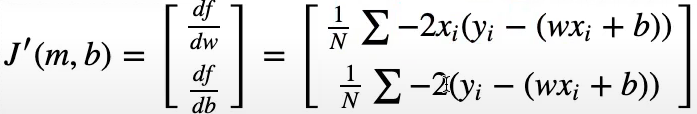

**Sigmoid Function**

This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1.

In machine learning, sigmoid function is used to map predictions to probabilities. The sigmoid function has an S shaped curve. It is also called sigmoid curve.

A Sigmoid function is a special case of the Logistic function. It is given by the following mathematical formula.

Graphically, we can represent sigmoid function with the following graph.

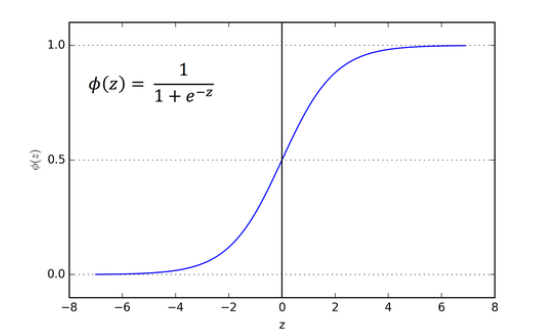

**Decision boundary**

The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

p ≥ 0.5 => class = 1

p < 0.5 => class = 0

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below

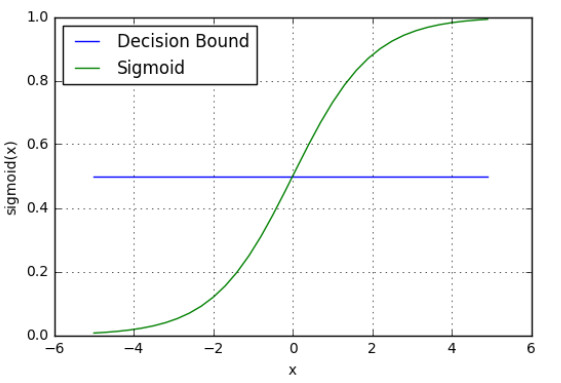

In [ ]:
class LogisticRegression:

  def __init__(self, lr=0.01, n_iters = 100):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None
    self.cost_list = []

  def fit(self, X, y):
    n_samples, f_features = X.shape

    self.weights = np.zeros(f_features)
    self.bias = 0

    for i in range(self.n_iters):
      z = np.dot(X, self.weights) + self.bias
      y_predicted = self.sigmoid(z)
      cost = - np.mean(y*np.log(y_predicted) + (1-y)*np.log(1-y_predicted))
      self.cost_list.append(cost)
      dw = (1/n_samples)* np.dot(X.T, (y_predicted - y))
      db = (1/n_samples)* np.sum(y_predicted - y)
      self.weights -= self.lr * dw
      self.bias -= self.lr * db

  def predict_probability(self, X):
    z = np.dot(X, self.weights) + self.bias
    y_predicted = self.sigmoid(z)
    return y_predicted

  def predict(self, X):
    z = np.dot(X, self.weights) + self.bias
    y_predicted = self.sigmoid(z)
    y_predicted_cls = [1 if i >= 0.5 else 0 for i in y_predicted]
    return y_predicted_cls

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def plot_train_cost(self):
    plt.plot(self.cost_list)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

In [ ]:
regressor = LogisticRegression(lr = 0.1, n_iters = 10000)
regressor.fit(X_train, y_train)

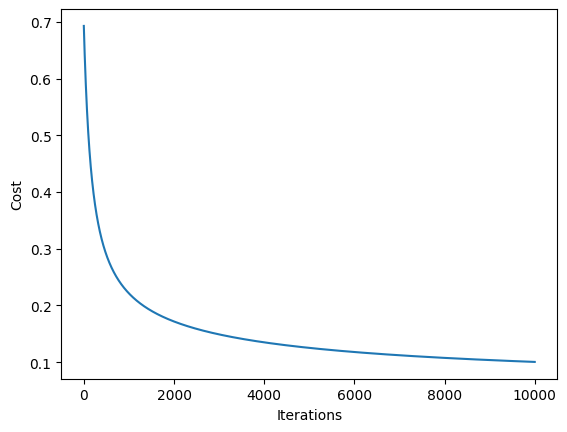

In [ ]:
regressor.plot_train_cost()

In [ ]:
predicted = regressor.predict(X_test)

In [ ]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)
mse(y_test, predicted)

np.float64(0.023255813953488372)

In [ ]:
percent = 100 - np.mean(np.abs(predicted - y_test)) * 100
print(f"test accuracy: {percent} %")

test accuracy: 97.67441860465117 %


### metrics

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, predicted)
print(cm)

[[54  0]
 [ 2 30]]


<Axes: >

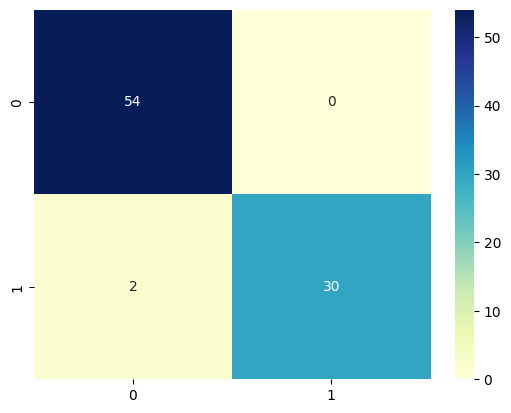

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

---
**Precision**

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

---

**Recall**

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.


---


**f1-score**


f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.


---

**Support**

Support is the actual number of occurrences of the class in our dataset.

---

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.94      0.97        32

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86

